In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("Clicked Ads Dataset.csv")

## Quick Look

Tahapan Pengerjaan
1. Download file dataset (done)
2. Buat analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak(Hint: Perhatikan distribusi pada setiap kolom pada dataset) (done)
3. Buatlah bivariate analysis pada variable yang telah diteliti pada univatriate analysis (Hint:Perhatikan hubungan antar kolom pada dataset)(done)
4. Buatlah korelasi antar kolom dan lakukan multivariate analysis (Hint: Carilah hubungan antar kolom yang memiliki nilai korelasi yang tinggi) (done)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [7]:
# drop primary key
df = df.drop('Unnamed: 0', axis=1)

In [8]:
# grouping columns based on types
cats = ['Male','city','province','category']
nums = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
y = ['Clicked on Ad']

In [9]:
df[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [10]:
df[cats].describe()

,Male,city,province,category
count,997,1000,1000,1000
unique,2,30,16,10
top,Perempuan,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,64,253,112


### Univariate Analysis

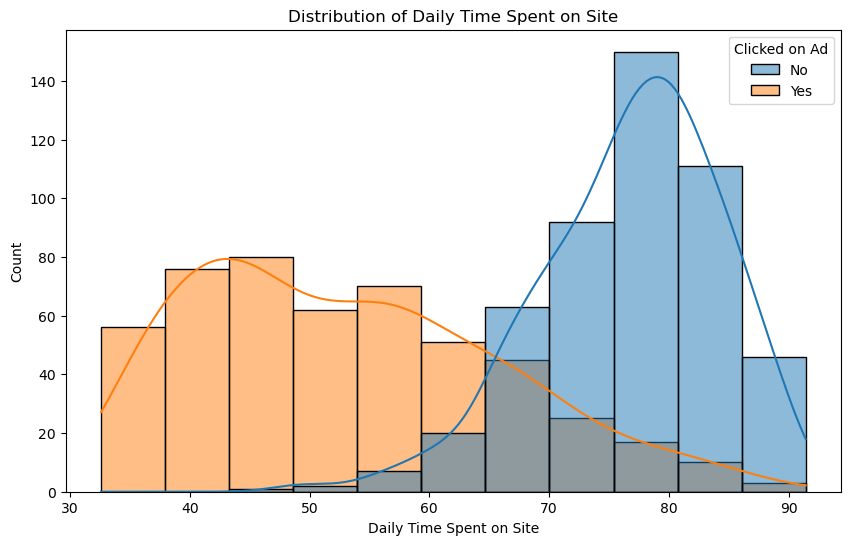

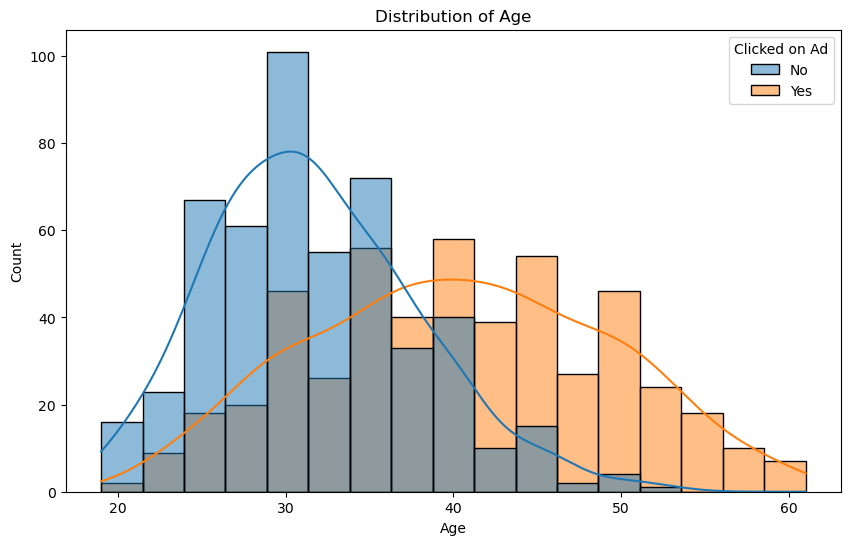

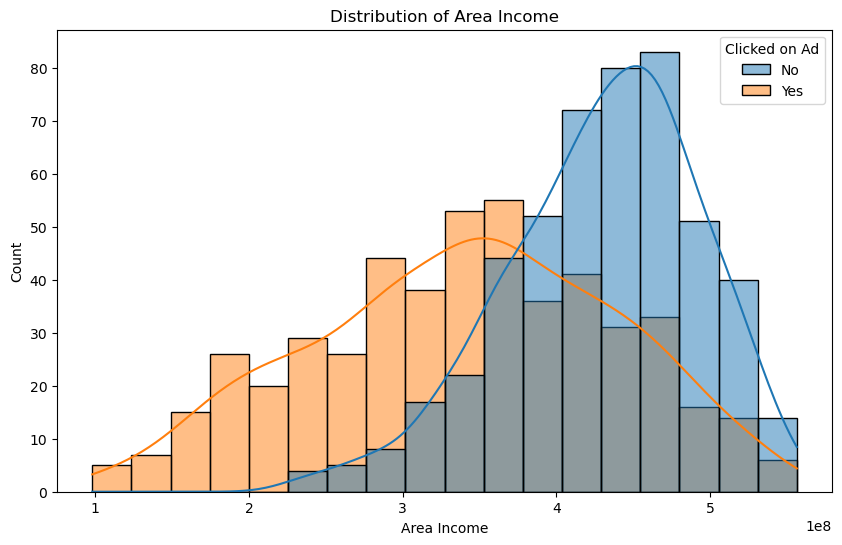

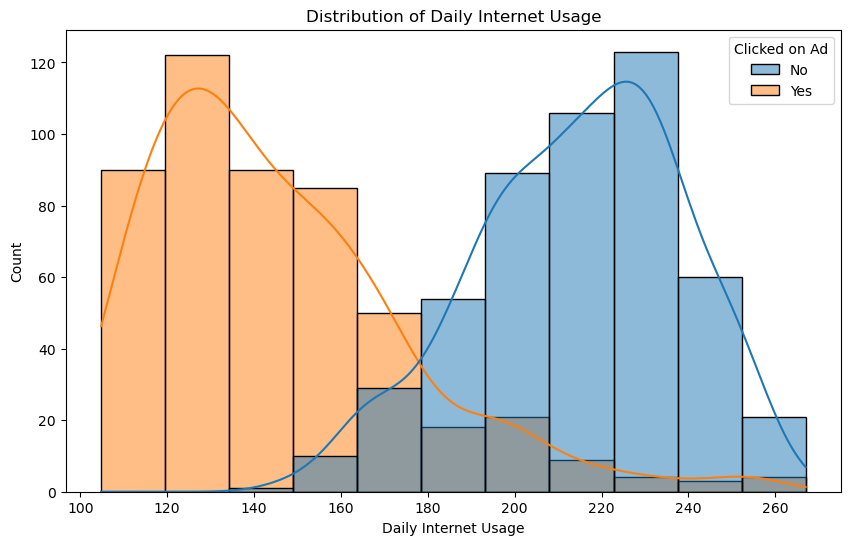

In [11]:
for col in df[nums]:
    plt.figure(figsize=(10,6))
    sns.histplot(df, x=col, hue='Clicked on Ad', kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

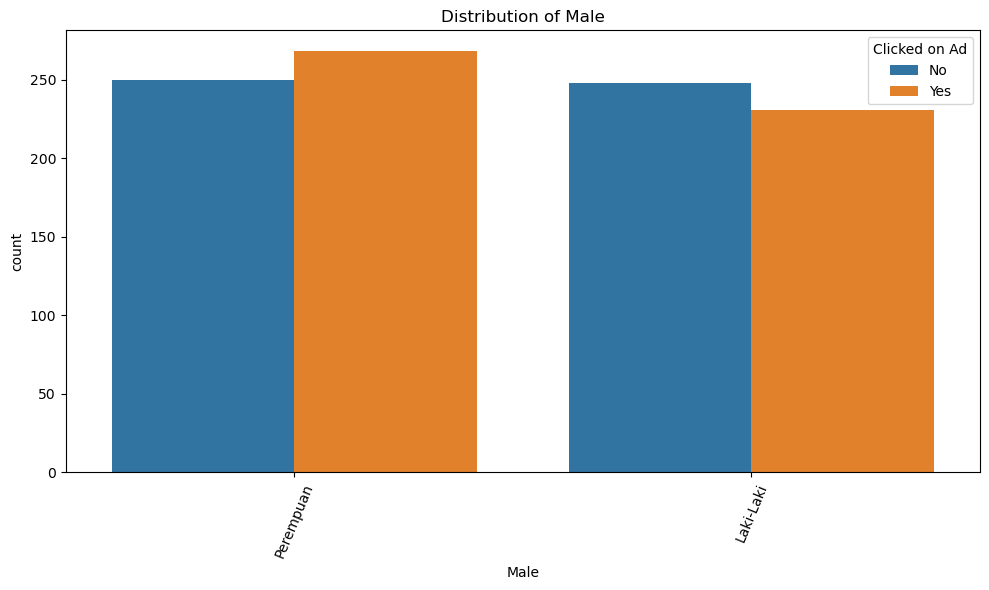

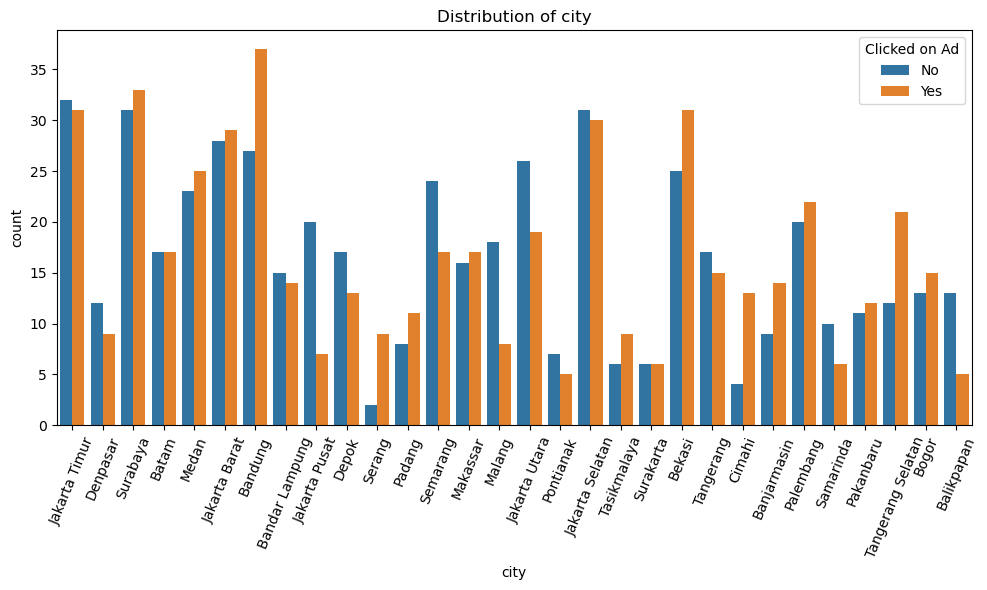

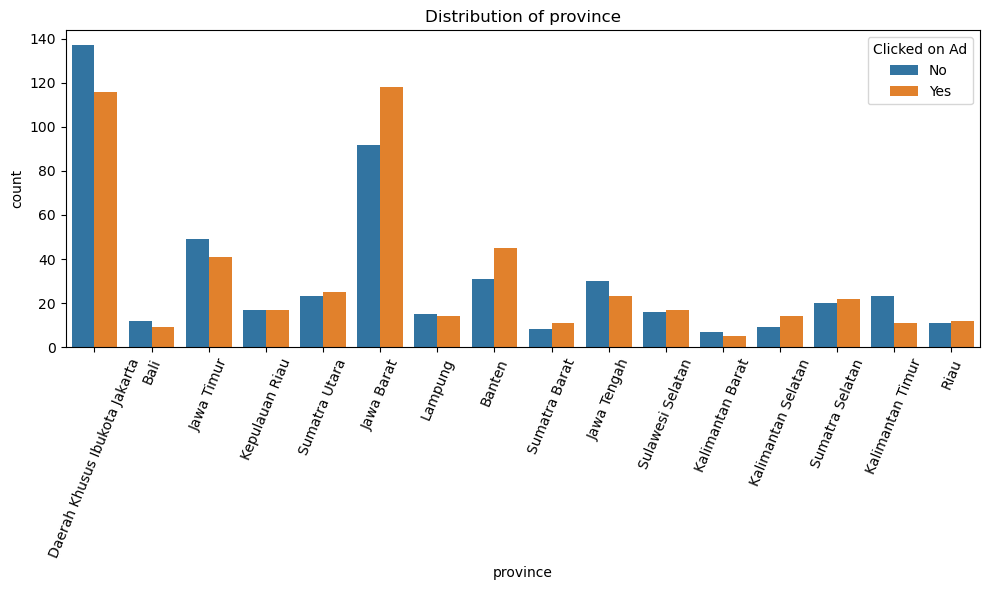

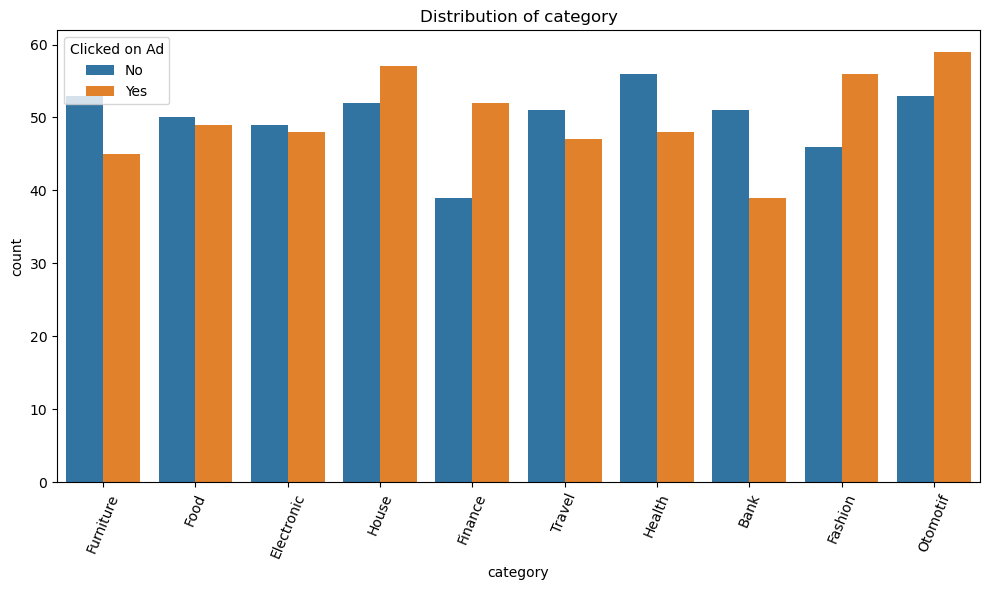

In [12]:
for col in df[cats]:
    plt.figure(figsize=(10,6))
    sns.countplot(df, x=col, hue='Clicked on Ad')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=67.5)
    plt.tight_layout()
    plt.show()

### Bivariate

<Figure size 2000x1500 with 0 Axes>

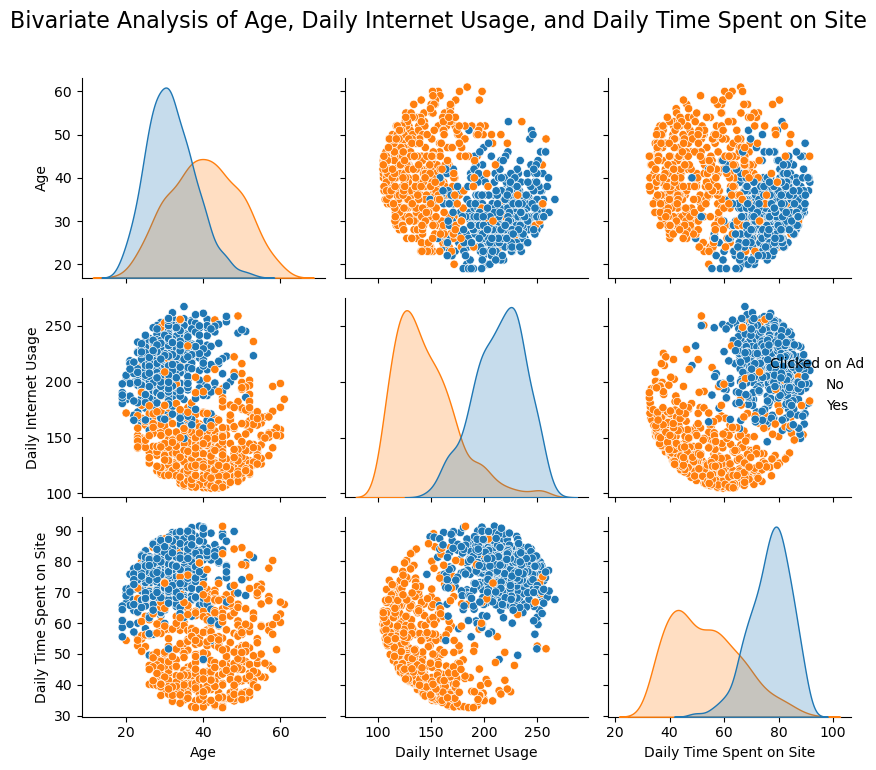

In [13]:
# Define the columns we want to include in the pairplot
columns_to_plot = ['Age', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Clicked on Ad']

# Create the pairplot
plt.figure(figsize=(20, 15))
sns.pairplot(df[columns_to_plot], hue='Clicked on Ad', diag_kind='kde')
plt.suptitle('Bivariate Analysis of Age, Daily Internet Usage, and Daily Time Spent on Site', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Multivariate

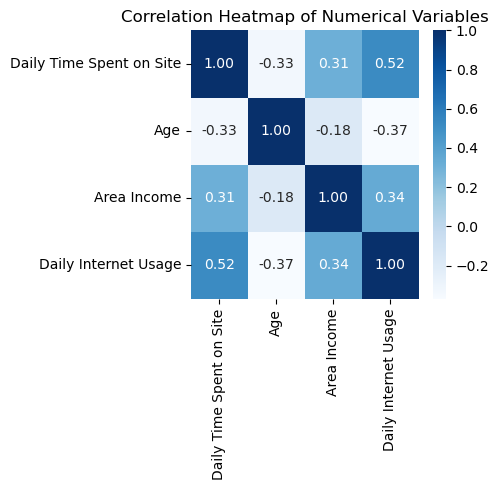

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(5,5))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

### Statistical Analysis

#### Independent sample t-test

In [15]:
ad_yes = df[df['Clicked on Ad']=='Yes']
ad_no = df[df['Clicked on Ad']!='Yes']

In [16]:
ad_yes.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
7,66.00,48,172153310.0,131.76,Laki-Laki,3/7/2016 1:40,Yes,Bandar Lampung,Lampung,Health
10,47.64,49,319427570.0,122.02,Perempuan,3/16/2016 20:19,Yes,Depok,Jawa Barat,Food
12,69.57,48,361458440.0,113.12,Laki-Laki,6/3/2016 1:14,Yes,Serang,Banten,Travel
14,42.95,33,216832000.0,143.56,Perempuan,3/24/2016 9:31,Yes,Padang,Sumatra Barat,Food
15,63.45,23,365275610.0,140.64,Laki-Laki,3/9/2016 3:41,Yes,Padang,Sumatra Barat,House


In [17]:
ad_no.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [18]:
import scipy.stats as st

ttest = st.ttest_ind(a = ad_yes['Age'], b=ad_no['Age'])
p_value = ttest.pvalue

print('P-Value :',p_value)
if p_value >= 0.05:
    print('Statistical analysis revealed no significant difference in mean age between customers who clicked on the advertisement and those who did not')
else:
    print('Statistical analysis revealed there is significant difference in mean age between customers who clicked on the advertisement and those who did not')

print(p_value)

P-Value : 3.129808309288568e-62
Statistical analysis revealed there is significant difference in mean age between customers who clicked on the advertisement and those who did not
3.129808309288568e-62


- Other numerical features were not test for independent sample t-test due to missing data, which will be addressed in the stage 2 (Data preprocessing)

#### Chi Square

In [19]:
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
contingency_table = pd.crosstab(df['Clicked on Ad'], df['Male'])

# Hitung chi-square statistic dan p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpretasi hasil
if p < 0.05:
    print("Ada perbedaan signifikan antara proporsi jenis kelamin customer pada kelompok ads dan no ads.")
else:
    print("Tidak ada perbedaan signifikan antara proporsi jenis kelamin customer pada kelompok ads dan no ads.")

print(p)

Tidak ada perbedaan signifikan antara proporsi jenis kelamin customer pada kelompok ads dan no ads.
0.29617009291712565


In [20]:
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
contingency_table = pd.crosstab(df['Clicked on Ad'], df['category'])

# Hitung chi-square statistic dan p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpretasi hasil
if p < 0.05:
    print("Ada perbedaan signifikan antara proporsi kategori pilihan customer pada kelompok ads dan no ads.")
else:
    print("Tidak ada perbedaan signifikan antara proporsi kategori pilihan customer pada kelompok ads dan no ads.")

print(p)

Tidak ada perbedaan signifikan antara proporsi kategori pilihan customer pada kelompok ads dan no ads.
0.6951548878314121


In [21]:
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
contingency_table = pd.crosstab(df['Clicked on Ad'], df['city'])

# Hitung chi-square statistic dan p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpretasi hasil
if p < 0.05:
    print("Ada perbedaan signifikan antara proporsi kota customer pada kelompok ads dan no ads.")
else:
    print("Tidak ada perbedaan signifikan antara proporsi kota customer pada kelompok ads dan no ads.")

print(p)

Tidak ada perbedaan signifikan antara proporsi kota customer pada kelompok ads dan no ads.
0.20628493238538614


In [22]:
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
contingency_table = pd.crosstab(df['Clicked on Ad'], df['province'])

# Hitung chi-square statistic dan p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Interpretasi hasil
if p < 0.05:
    print("Ada perbedaan signifikan antara proporsi provinsi customer pada kelompok ads dan no ads.")
else:
    print("Tidak ada perbedaan signifikan antara proporsi provinsi customer pada kelompok ads dan no ads.")

print(p)

Tidak ada perbedaan signifikan antara proporsi provinsi customer pada kelompok ads dan no ads.
0.38063132445004344


Statistical analysis results:
- In terms of categorical features over ads, no significant difference observed.
- In terms of numerical features, age can be seen having significant difference over ads. However, other numerical features could not be tested due to missing data which will be addressed in the next stage.

## Data Cleaning & Preprocessing

Tahapan Pengerjaan
- Bersihkan dataset dari missing value dan duplicated value (Hint: Perhatikan null/missing value, data yang kosong dapat dibuang atau diisi dengan nilai yang tidak mengubah sebaran data) (done)
- Lakukan feature encoding pada dataset (Hint: Perhatikan tipe data pada setiap kolomnya)
- Split data menjadi feature dan target (Hint: Pilih satu kolom menjadi target dan sisanya menjadi feature data)
- Lakukan ekstraksi pada kolom yang berhubungan dengan waktu (Hint: Buatlah kolom baru untuk mengekstraksi data waktu menjadi tahun, bulan, pekan, dan hari.)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


### Duplicate and Missing Data
- duplicated data: none
- missing data:
    - Daily Time Spent on Site - fill with mean
    - Daily Internet Usage - fill with mean
    - Area Income - fill with median
    - Male - fill with 'Laki-Laki' as to match the number with 'Perempuan'
- rename column 'Male' to 'Sex'

In [24]:
duplicate_row = df[df.duplicated(keep=False)]
duplicate_row

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category


In [25]:
nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
18                      54.70   36  217612780.0                   NaN   
25                        NaN   28  453796000.0                204.79   
32                      59.05   57          NaN                169.23   
39                        NaN   39  192558870.0                162.08   
46                      69.62   20          NaN                202.25   
63                        NaN   32  431207350.0                   NaN   
90                      69.90   43          NaN                138.35   
99                      79.71   34  486197810.0                   NaN   
110                       NaN   60  422333660.0                176.98   
151                       NaN   35  507674020.0                172.10   
158                     80.46   27          NaN                   NaN   
177                     72.04   22          NaN                199.43   
247                     57.05   41  351952230.0    

In [26]:
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Male'] = df['Male'].fillna('Laki-Laki')

In [27]:
df = df.rename(columns={'Male': 'Sex'})

### Feature Encoding

- Label encoding
    - Age to be categorised and encoded
    - Sex to be encoded (0: Laki-laki; 1: Perempuan)
    - Clicked on Ad to be encoded (0: Yes; 1: No)
- One Hot Encoding
    - City
    - Province
    - Category

In [28]:
df['Sex'] = df['Sex'].replace({'Perempuan': 1, 'Laki-Laki' : 0}).astype(int)
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No': 1, 'Yes' : 0}).astype(int)

/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_11371/3894525056.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'Perempuan': 1, 'Laki-Laki' : 0}).astype(int)
/var/folders/_9/tvxq38vj3t94zs4ngcgwcfq80000gn/T/ipykernel_11371/3894525056.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No': 1, 'Yes' : 0}).astype(int)


In [29]:
df = pd.get_dummies(df, columns=['category','city','province'], dtype = int)

### Feature Engineering

- Extract timestamp to get year, month, week, and day

In [30]:
df['Timestamp'].value_counts()

Timestamp
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: count, Length: 997, dtype: int64

In [31]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [32]:
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['week'] = df['Timestamp'].dt.isocalendar().week
df['day'] = df['Timestamp'].dt.day


In [33]:
df['week'] = df['week'].astype(int)

In [34]:
df = df.drop('Timestamp', axis=1)

In [35]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Sex,Clicked on Ad,category_Bank,category_Electronic,category_Fashion,category_Finance,...,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,year,month,week,day
0,68.95,35,432837300.0,256.09,1,1,0,0,0,0,...,0,0,0,0,0,0,2016,3,12,27
1,80.23,31,479092950.0,193.77,0,1,0,0,0,0,...,0,0,0,0,0,0,2016,4,14,4
2,69.47,26,418501580.0,236.50,1,1,0,1,0,0,...,0,0,0,0,0,0,2016,3,10,13
3,74.15,29,383643260.0,245.89,0,1,0,0,0,0,...,0,0,0,0,0,0,2016,1,1,10
4,68.37,35,517229930.0,225.58,1,1,0,0,0,1,...,0,0,0,0,0,1,2016,6,22,3


### Feature Standardisation

- 'Daily Time Spent on Site' and 'Daily Internet Usage' roughly normal but slightly skewed, standard scaling (Z-score normalization) is used.
- 'Area Income' is rightly skewed, log transformation followed by standard scaling, which can help reduce the skewness before standardization.
- 'Age' to be scaled with Min-Max scaling as it will preserve the relative differences while scaling all values to a 0-1 range.

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mms = MinMaxScaler()

df['dtss_trsf'] = ss.fit_transform(df[['Daily Time Spent on Site']])

df['diu_trsf'] = ss.fit_transform(df[['Daily Internet Usage']])

df['ai_trsf'] = ss.fit_transform(df[['Area Income']])

df['age_trsf'] = mms.fit_transform(df[['Age']])

### Split Data

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(['Clicked on Ad','dtss_trsf','diu_trsf','ai_trsf','age_trsf'], axis=1)
y = df['Clicked on Ad']
X_trsf = df.drop(['Clicked on Ad','Daily Time Spent on Site','Daily Internet Usage','Area Income','Age'], axis=1)
y_trsf = df['Clicked on Ad']
# 'Clicked on Ad' value count
print("Distribution of target 'Clicked on Ad'")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_trsf_train, X_trsf_test, y_trsf_train, y_trsf_test = train_test_split(X_trsf, y_trsf, test_size=0.2, random_state=42)

Distribution of target 'Clicked on Ad'
Clicked on Ad
1    500
0    500
Name: count, dtype: int64


- no need to do handling imbalance class as shown on the target data above which is balance between values.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Daily Time Spent on Site                1000 non-null   float64
 1   Age                                     1000 non-null   int64  
 2   Area Income                             1000 non-null   float64
 3   Daily Internet Usage                    1000 non-null   float64
 4   Sex                                     1000 non-null   int64  
 5   Clicked on Ad                           1000 non-null   int64  
 6   category_Bank                           1000 non-null   int64  
 7   category_Electronic                     1000 non-null   int64  
 8   category_Fashion                        1000 non-null   int64  
 9   category_Finance                        1000 non-null   int64  
 10  category_Food                           1000 non-null   int64

- While checking, it seems that log transformation for 'Area Income' error as there's null value after transforming. Hence, standard normalisation is used.

## Data Modelling

Tahapan Pengerjaan
1. Bagilah data secara terpisah yang nanti akan digunakan sebagai data train dan data test (Hint: "Data train 70-80% dan Data test 20-30%") done
2. Buatlah dua eksperimen model machine learning dengan beberapa jenis algoritma model machine learning, dimana eksperimen pertama tanpa menggunakan normalisasi data, dan yang kedua menggunakan normalisasi data. (Hint: Gunakan model machine learning yang sama pada kedua experiment tersebut.) done
3. Buatlah evaluasi model menggunakan confusion matrix serta tunjukan feature important dari hasil model tersebut.(Hint: Perhatikan nilai presentasi tertinggi dari salah satu confusion matrix yang sudah ditentukan pada setiap evaluasi model, serta ambil 2 fitur utama yang dapat menentukan keberhasilan marketing.) done

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))   
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))


    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval test): '+ str(score['test_score'].mean()))
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    

In [68]:
def eval_classification_trsf(model):
    y_trsf_pred = model.predict(X_trsf_test)
    y_trsf_pred_train = model.predict(X_trsf_train)
    y_trsf_pred_proba = model.predict_proba(X_trsf_test)
    y_trsf_pred_proba_train = model.predict_proba(X_trsf_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_trsf_test, y_trsf_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_trsf_train, y_trsf_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_trsf_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_trsf_pred_train))   
    print("Recall (Test Set): %.2f" % recall_score(y_trsf_test, y_trsf_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_trsf_train, y_trsf_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_trsf_test, y_trsf_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_trsf_train, y_trsf_pred_train))


    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_trsf_test, y_trsf_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_trsf_train, y_trsf_pred_proba_train[:, 1]))
    #
    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval test): '+ str(score['test_score'].mean()))
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    

In [94]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return cm

def create_confusion_matrix_trsf(y_trsf_test, y_trsf_pred, model_name):
    cm_trsf = confusion_matrix(y_trsf_test, y_trsf_pred)

    plt.figure(figsize=(10,7))
    sns.heatmap(cm_trsf, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return cm_trsf

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

logreg_trsf = LogisticRegression()
logreg_trsf.fit(X_trsf_train, y_trsf_train)
y_pred_trsf_logreg = logreg_trsf.predict(X_trsf_test)

In [96]:
eval_classification(logreg)

Accuracy (Test Set): 0.45
Accuracy (Train Set): 0.51
Precision (Test Set): 0.45
Precision (Train Set): 0.51
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.68
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.79
recall (crossval test): 1.0
recall (crossval train): 1.0


In [97]:
eval_classification_trsf(logreg_trsf)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.97
Precision (Test Set): 0.91
Precision (Train Set): 0.97
Recall (Test Set): 0.94
Recall (Train Set): 0.98
F1-Score (Test Set): 0.93
F1-Score (Train Set): 0.98
roc_auc (test-proba): 0.97
roc_auc (train-proba): 0.99
recall (crossval test): 1.0
recall (crossval train): 1.0


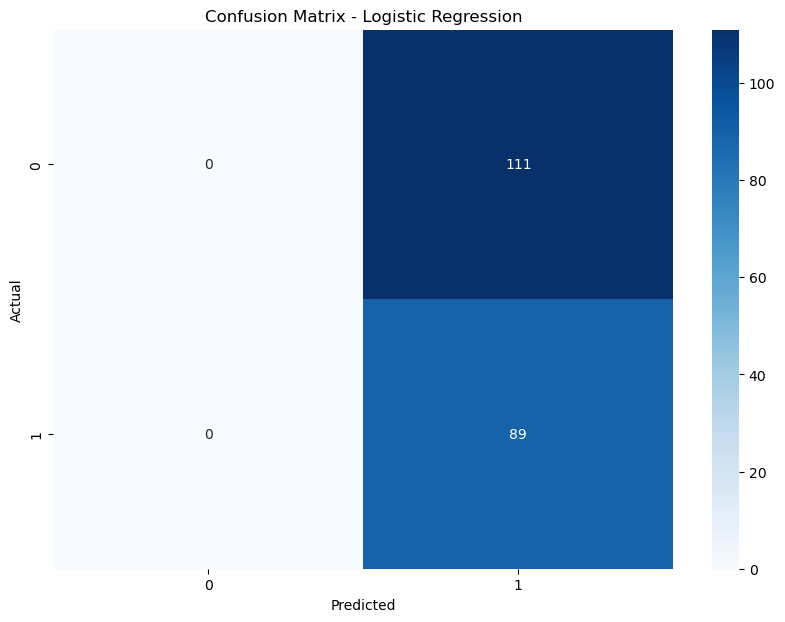

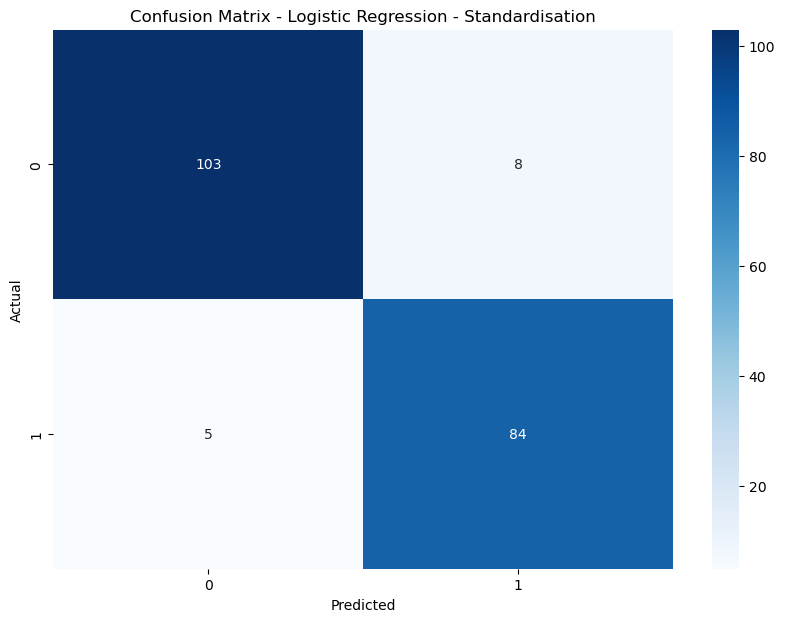

In [98]:
cm_logreg = create_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')
cm_logreg_trsf = create_confusion_matrix_trsf(y_trsf_test, y_pred_trsf_logreg, 'Logistic Regression - Standardisation')

### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_trsf = DecisionTreeClassifier()
dt_trsf.fit(X_trsf_train, y_trsf_train)
y_pred_dt_trsf = dt_trsf.predict(X_trsf_test)

In [100]:
eval_classification(dt)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 1.00
Precision (Test Set): 0.90
Precision (Train Set): 1.00
Recall (Test Set): 0.90
Recall (Train Set): 1.00
F1-Score (Test Set): 0.90
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval test): 0.9439024390243901
recall (crossval train): 1.0


In [101]:
eval_classification_trsf(dt_trsf)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 1.00
Precision (Test Set): 0.91
Precision (Train Set): 1.00
Recall (Test Set): 0.90
Recall (Train Set): 1.00
F1-Score (Test Set): 0.90
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
recall (crossval test): 0.9512195121951219
recall (crossval train): 1.0


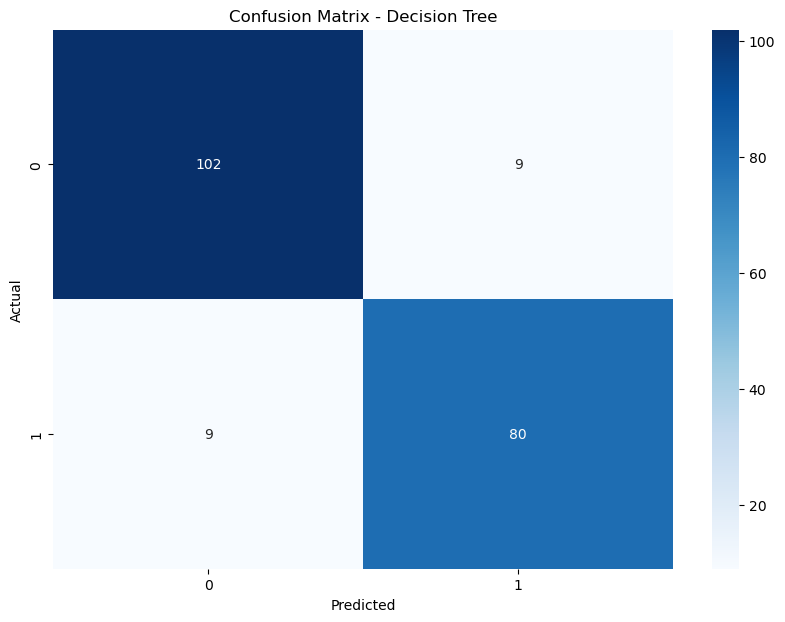

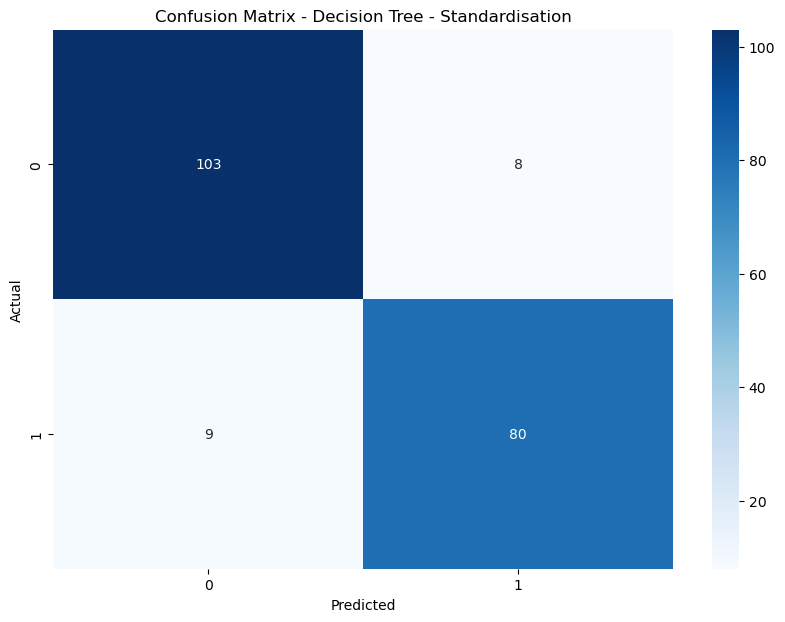

In [102]:
cm_dt = create_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
cm_dt_trsf = create_confusion_matrix_trsf(y_trsf_test, y_pred_dt_trsf, 'Decision Tree - Standardisation')

### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, classification_report
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_trsf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_trsf.fit(X_trsf_train, y_trsf_train)
y_pred_rf_trsf = rf_trsf.predict(X_trsf_test)

In [104]:
eval_classification(rf)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.93
Precision (Train Set): 1.00
Recall (Test Set): 0.92
Recall (Train Set): 1.00
F1-Score (Test Set): 0.93
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval test): 0.9658536585365853
recall (crossval train): 1.0


In [105]:
eval_classification_trsf(rf_trsf)

Accuracy (Test Set): 0.93
Accuracy (Train Set): 1.00
Precision (Test Set): 0.92
Precision (Train Set): 1.00
Recall (Test Set): 0.91
Recall (Train Set): 1.00
F1-Score (Test Set): 0.92
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval test): 0.9658536585365853
recall (crossval train): 1.0


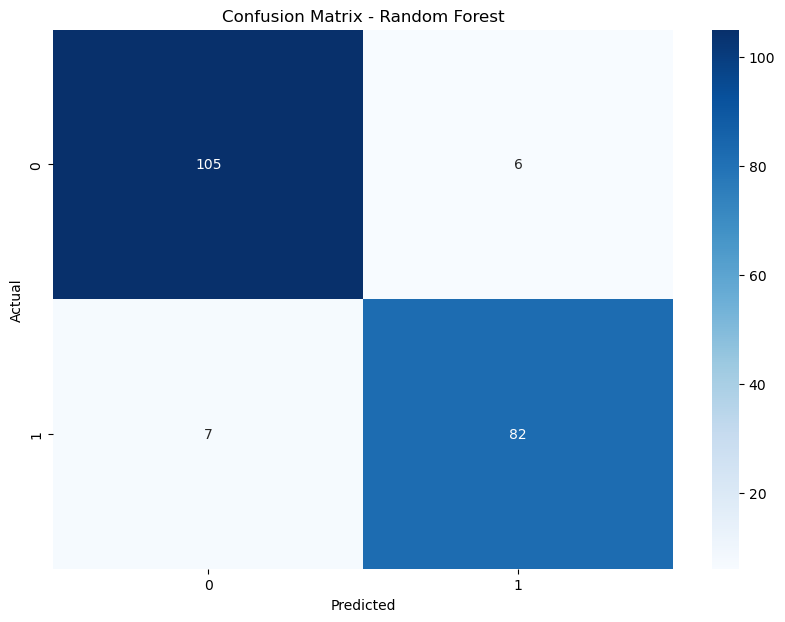

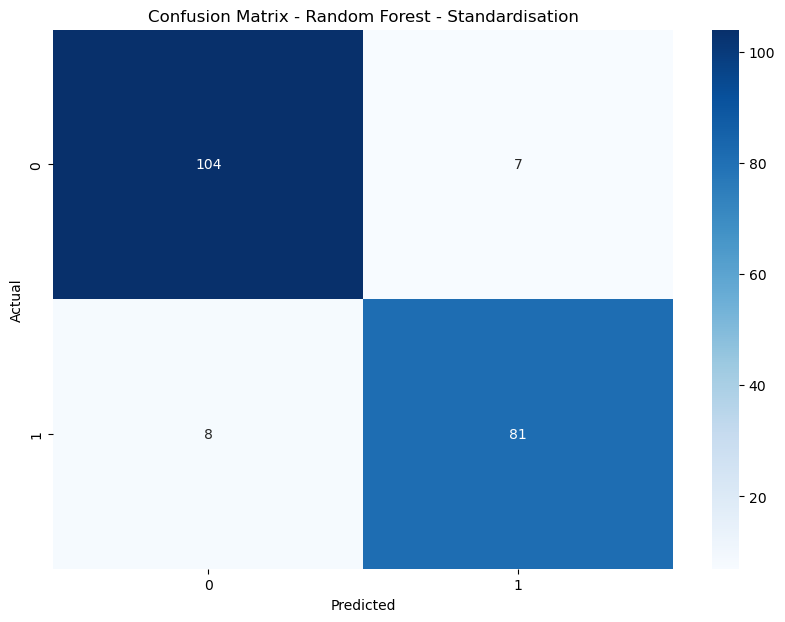

In [106]:
cm_rf = create_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
cm_rf_trsf = create_confusion_matrix_trsf(y_trsf_test, y_pred_rf_trsf, 'Random Forest - Standardisation')

### KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_trsf = KNeighborsClassifier()
knn_trsf.fit(X_trsf_train, y_trsf_train)
y_pred_knn_trsf = knn_trsf.predict(X_trsf_test)

In [108]:
eval_classification(knn)

Accuracy (Test Set): 0.64
Accuracy (Train Set): 0.78
Precision (Test Set): 0.58
Precision (Train Set): 0.77
Recall (Test Set): 0.66
Recall (Train Set): 0.81
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.79
roc_auc (test-proba): 0.67
roc_auc (train-proba): 0.86
recall (crossval test): 0.7322950337937115
recall (crossval train): 0.8096133886870783


In [109]:
eval_classification_trsf(knn_trsf)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 0.96
Precision (Test Set): 0.84
Precision (Train Set): 0.93
Recall (Test Set): 0.96
Recall (Train Set): 1.00
F1-Score (Test Set): 0.89
F1-Score (Train Set): 0.96
roc_auc (test-proba): 0.95
roc_auc (train-proba): 0.99
recall (crossval test): 0.7322950337937115
recall (crossval train): 0.8096133886870783


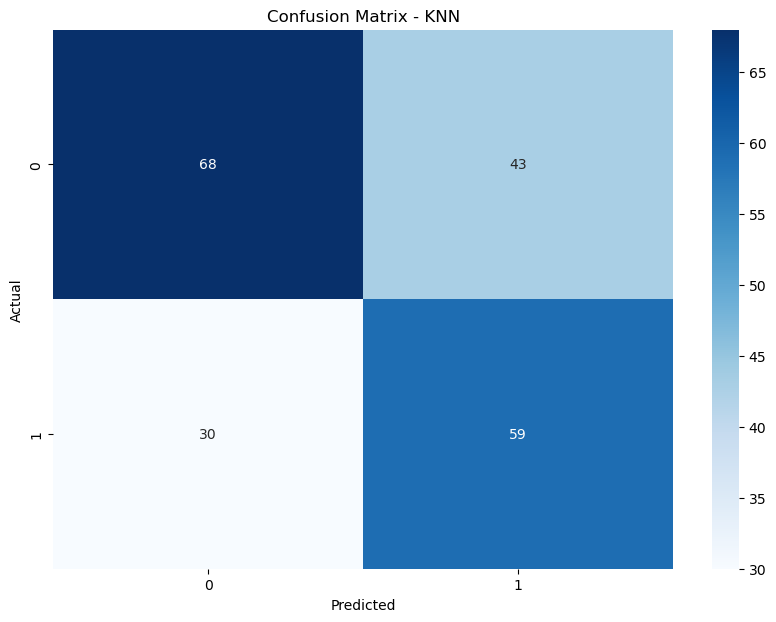

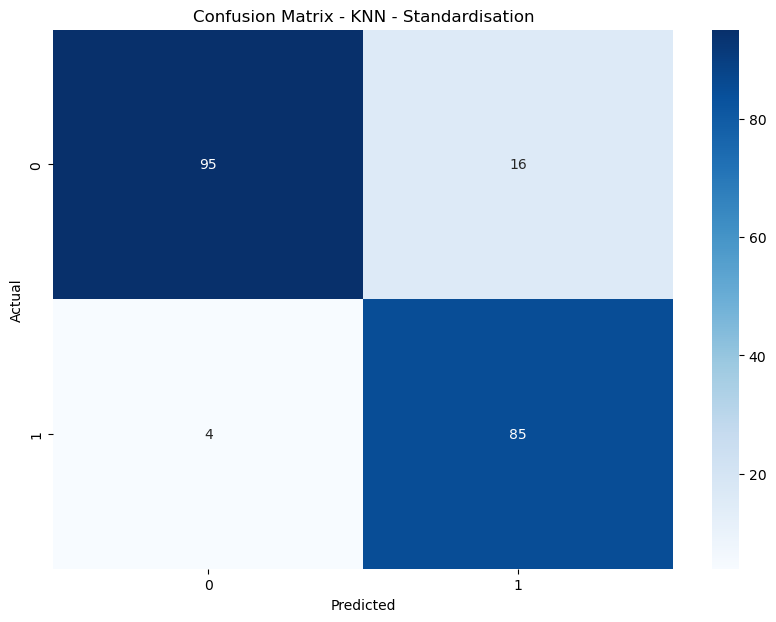

In [110]:
cm_knn = create_confusion_matrix(y_test, y_pred_knn, 'KNN')
cm_knn_trsf = create_confusion_matrix_trsf(y_trsf_test, y_pred_knn_trsf, 'KNN - Standardisation')

### XG Boost

In [111]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

xgb_trsf = xgb.XGBClassifier()
xgb_trsf.fit(X_trsf_train, y_trsf_train)
y_trsf_pred_xgb = xgb_trsf.predict(X_trsf_test)

In [112]:
eval_classification(xgb_model)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.94
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval test): 0.9682926829268294
recall (crossval train): 1.0


In [113]:
eval_classification_trsf(xgb_trsf)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.94
Precision (Train Set): 1.00
Recall (Test Set): 0.92
Recall (Train Set): 1.00
F1-Score (Test Set): 0.93
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
recall (crossval test): 0.9682926829268294
recall (crossval train): 1.0


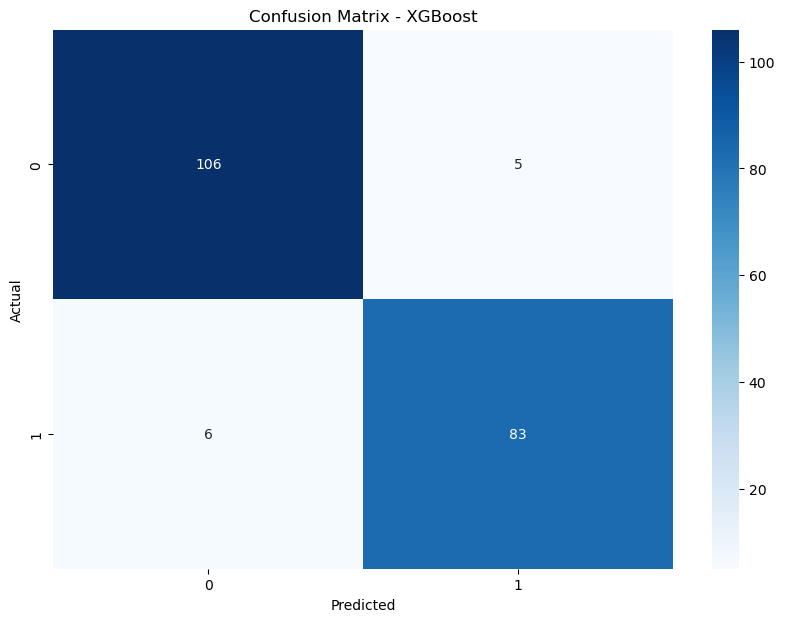

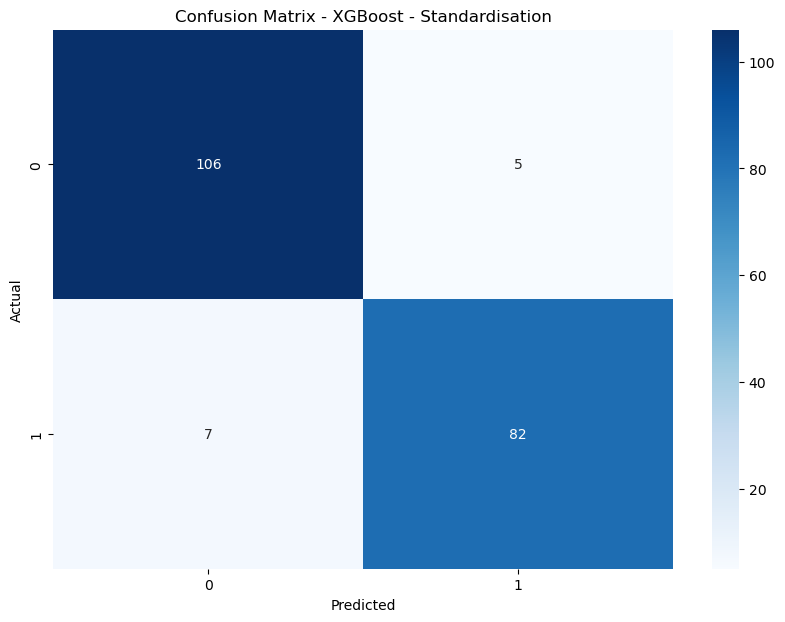

In [119]:
cm_xgb = create_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
cm_xgb_trsf = create_confusion_matrix_trsf(y_trsf_test, y_trsf_pred_xgb, 'XGBoost - Standardisation')

### Summary

For this particular project, the company wants to understand how well the advertisement reaches its target audience, so they can attract customers to click on the ad. While focusing on false positive indicate that avoid showing ads to uninterested customers, this project will focused on lower false negative to ensure capturing every possible click.
wasted ad spend (FP) or missed customer opportunities (FN).

FN count:
- XGBoost (5,5)
- KNN (16,16)
- Random Forest (6,7)
- Decision Tree (9,10)
- Logistic Regression (6,7)

Based on the percentage of false negative, XGBoost performed best compared to other algorithms with only 5 false negative both model with transformed and non-transformed data. However, the range between train and test score among XGBoost models is tighter with non-transformed data compared the transformed. Hence, XGBoost with normal data is seleceted for this project.

### Feature Importance

In [115]:
importances_xgb = xgb_model.feature_importances_
feature_importances = pd.DataFrame({
    'feature': X_test.columns,
    'importance': importances_xgb
})


feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

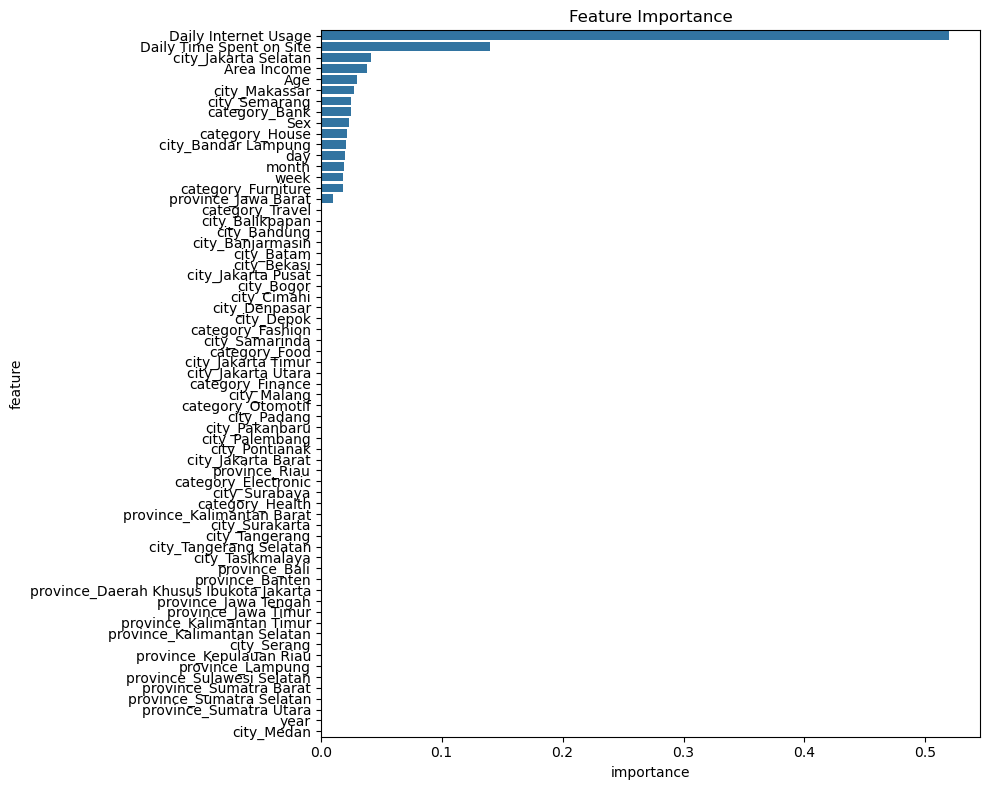

In [116]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.sort_values('importance', ascending=False))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

From the graph above, it can be seen that Daily Internet Usage and Daily Time Spent on Site are the top two features that influence customer to click on the ads. While both also correlated, both features are retained as they are not redundant (r=.52) and different features based on domain knowledge. Hence, we can accept the two features influencing the target. 

In [117]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.94      0.93      0.94        89

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

